In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline

1. Сгенерируйте данные с помощью кода:

`from sklearn.datasets import make_classification`

`x_data_generated, y_data_generated = make_classification(scale=1)`

In [24]:
x_data_generated, y_data_generated = make_classification(scale=1)

2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
`cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()`

In [25]:
cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring="accuracy").mean()

0.8800000000000001

3. Используйте статистические методы для отбора признаков:

    a) Выберите признаки на основе матрицы корреляции.

    b) Отсеките низковариативные признаки (VarianceThreshold).

    c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [26]:
print(x_data_generated.shape)
print(y_data_generated.shape)

(100, 20)
(100,)


In [27]:
X = np.column_stack((x_data_generated, y_data_generated))
X.shape

(100, 21)

<AxesSubplot:>

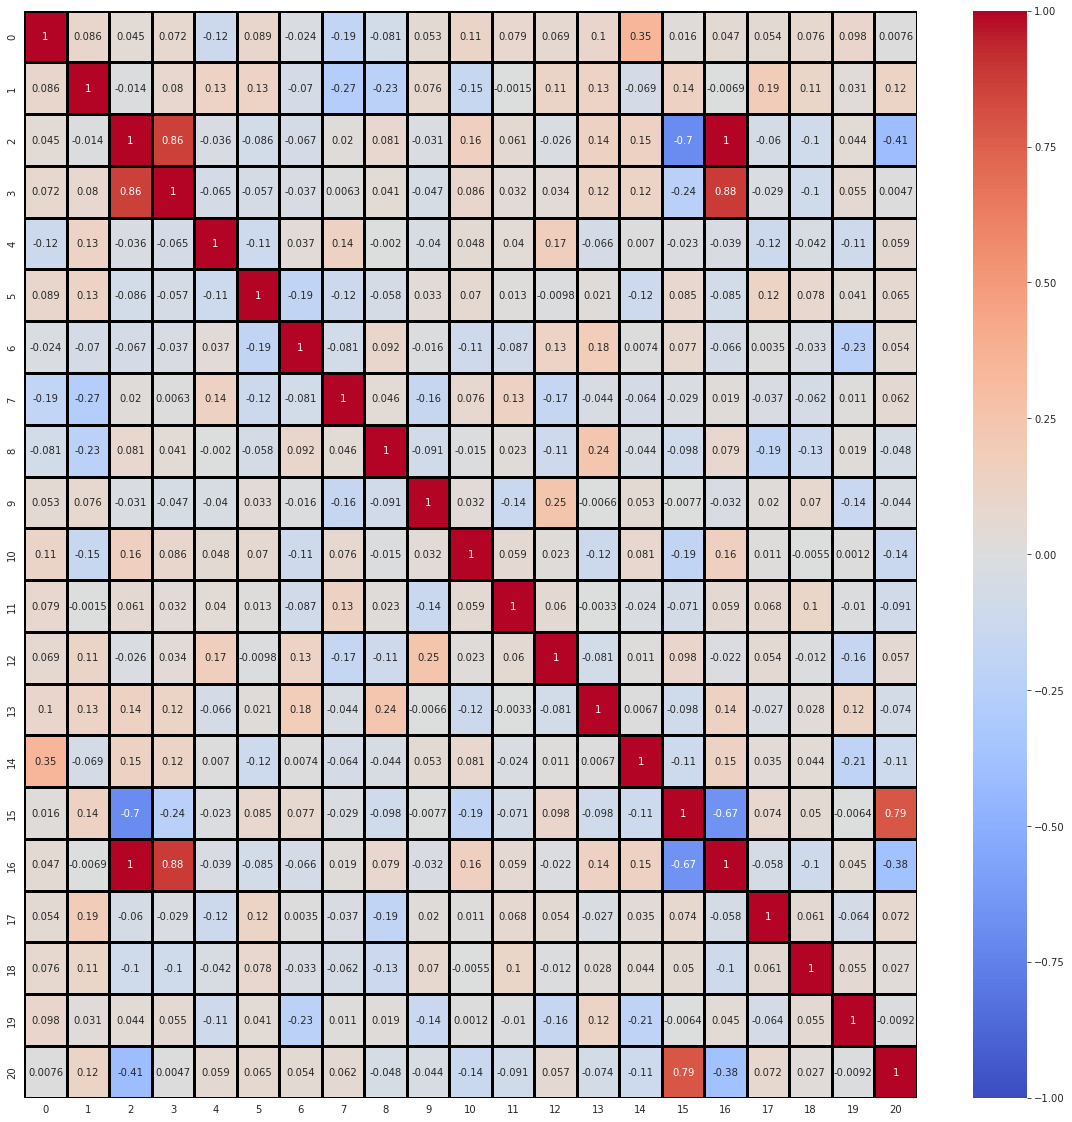

In [28]:
corr_matrix = pd.DataFrame(X).corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, annot = True, vmin=-1, vmax=1, center=0, cmap= 'coolwarm', linewidths=3,linecolor='black', ax=ax)

По таблице корреляции видим, что есть сильная корреляция между парами признаков: 2 и 3, 2 и 16, 3 и 16, 15 и 20. Далее будем удалять 3, 16 признаки, чтобы убрать корреляции. 20 признак удалять нельзя, это целевой признак, и с ним должна быть сильная корреляция

In [34]:
df = pd.DataFrame(X)
df = df.loc[:, (df.columns != 3) & (df.columns != 16)]
df.shape

(100, 19)

теперь удалим низковариативные признаки

In [70]:
df.shape
var = VarianceThreshold(threshold=1.)
df2 = var.fit_transform(df)
df2.shape

(100, 7)

Мы видим, что осталось только 7 признаков. Вот эти признаки:

In [71]:
df2 = pd.DataFrame(df2)
print(df2.head(1))

          0         1         2        3         4         5         6
0 -0.392738  3.392189  1.082493  4.19147 -2.256982 -0.714001 -1.584202


Мы видим, что целевой признак все равно удаляется функцией fit_transform, поэтому y берем из исходного фрейма. Поэтому принимаем для расчета метрики следующее:

In [76]:
x = df2
y = df[[20]].values.ravel()

In [77]:
cross_val_score(LogisticRegression(), x, y, scoring="accuracy").mean()

0.9099999999999999

7. Сформулируйте выводы по проделанной работе:

    a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [86]:
sum_df = pd.DataFrame(columns=["способ выбора признаков", "кол-во признаков", "средняя точность модели"])

In [87]:
sum_df.loc[len(sum_df)]=['без выбора', 20, 0.88]
sum_df.loc[len(sum_df)]=['удаление корреляций и низковариативных', 7, 0.91]

In [88]:
sum_df.head(2)

,способ выбора признаков,кол-во признаков,средняя точность модели
0,без выбора,20,0.88
1,удаление корреляций и низковариативных,7,0.91


Общий вывод: правильная работа с признаками может существенно повысить точность модели.